In [2]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot

jtplot.style()

import statsmodels.api as sm

In [3]:
df = pd.read_csv('./../data/Monsteruitslagen_Resultaten.csv')
df['datetime'] = pd.to_datetime(df.datum + ' ' + df.tijd)

def convert_tappunt(x):
    x = str(x).lower()
    if 'thermostatische douchemengkraan' in x or 'therm.' in x:
        return 'douche'
    if 'douche' in x:
        return 'douche'
    if '1e tappunt' in x:
        return '1e tappunt'
    return 'overige'

def convert_ruimte(x):
    x = str(x).lower()
    if 'kelder' in x:
        return 'kelder'
    if 'kamer' in x:
        return 'kamer'
    if 'appartement' in x:
        return 'appartement'
    if 'technische ruimte' in x:
        return 'technische ruimte'
    if 'kapsalon' in x:
        return 'kapsalon'
    return 'overige'
    
df['tappunt_simple'] = df.tappunt.apply(convert_tappunt)
df['ruimte_simple'] = df.ruimte.apply(convert_ruimte)
df['location_is_Noorderkroon'] = df.locatienaam.str.contains('Noorderkroon')

df_tmp = df[df.component == 'Totaal Legionella spp'].copy()
df_tmp.resultaat = df_tmp.resultaat.str.replace('<100', '0').astype(int)
df_tmp.resultaat.groupby(pd.qcut(df_tmp.tempvoor, 4)).describe()

def get_level(x):
    for i in [0,1,2,3,4]:
        if '{}.'.format(i) in x:
            return i
    return -1
    
df_tmp['app_level'] = df_tmp.ruimte.apply(get_level)

In [3]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp.datetime.dt.hour).describe()

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
8,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
9,14.0,0.142857,0.363137,0.0,0.0,0.0,0.00,1.0
10,60.0,0.416667,0.497167,0.0,0.0,0.0,1.00,1.0
11,82.0,0.451220,0.500677,0.0,0.0,0.0,1.00,1.0
12,91.0,0.285714,0.454257,0.0,0.0,0.0,1.00,1.0
13,98.0,0.234694,0.425986,0.0,0.0,0.0,0.00,1.0
14,94.0,0.265957,0.444211,0.0,0.0,0.0,1.00,1.0
15,20.0,0.250000,0.444262,0.0,0.0,0.0,0.25,1.0
16,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0


In [17]:
dummies = pd.get_dummies(df_tmp.datetime.dt.hour)
#back stepping
for x in [16, 8,11,10]:
    dummies = dummies.drop(x, axis=1)
model = sm.Logit(df_tmp.resultaat > 0,dummies)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.605396
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              resultaat   No. Observations:                  461
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.02238
Time:                        22:42:11   Log-Likelihood:                -279.09
converged:                       True   LL-Null:                       -285.48
                                        LLR p-value:                   0.01240
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
9             -1.7918      0.764     -2.346      0.019      -3.289      -0.295
12            -0.9163      0.232     -3.949      0.000      -1.371      -0.461
13            -1.1820      0.238     -4.959      0.000      -1.649      -0.715
14            -1.0152      0.233     -4.349      0.000      -1.473      -0.558
15            -1.0986      0.516     -2.127      0.033      -2.111      -0.086
==============================================================================
"""

In [4]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp.datetime.dt.dayofweek).describe()

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
0,149.0,0.268456,0.444651,0.0,0.0,0.0,1.00,1.0
1,9.0,0.444444,0.527046,0.0,0.0,0.0,1.00,1.0
2,163.0,0.361963,0.482049,0.0,0.0,0.0,1.00,1.0
3,60.0,0.250000,0.436667,0.0,0.0,0.0,0.25,1.0
4,80.0,0.312500,0.466437,0.0,0.0,0.0,1.00,1.0


In [20]:
dummies = pd.get_dummies(df_tmp.datetime.dt.dayofweek)
#back stepping
for x in [1]:
    dummies = dummies.drop(x, axis=1)
model = sm.Logit(df_tmp.resultaat > 0,dummies)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.613950
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              resultaat   No. Observations:                  461
Model:                          Logit   Df Residuals:                      457
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                0.008569
Time:                        22:42:33   Log-Likelihood:                -283.03
converged:                       True   LL-Null:                       -285.48
                                        LLR p-value:                    0.1798
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -1.0025      0.185     -5.423      0.000      -1.365      -0.640
2             -0.5669      0.163     -3.478      0.001      -0.886      -0.247
3             -1.0986      0.298     -3.685      0.000      -1.683      -0.514
4             -0.7885      0.241     -3.269      0.001      -1.261      -0.316
==============================================================================
"""

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


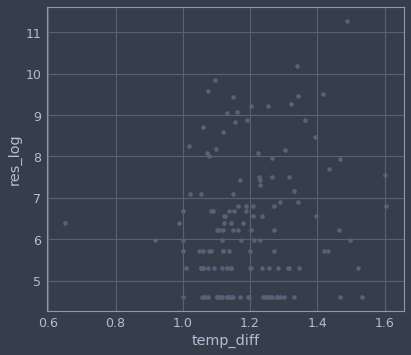

In [210]:
df_tmp['temp_diff'] = df_tmp.tempvoor / df_tmp.tempna
df_tmp['res_log'] = np.log(df_tmp.resultaat)
df_tmp.plot.scatter('temp_diff', 'res_log')

In [21]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp.datetime.dt.month).describe()

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1,38.0,0.289474,0.459606,0.0,0.0,0.0,1.0,1.0
2,30.0,0.200000,0.406838,0.0,0.0,0.0,0.0,1.0
3,54.0,0.277778,0.452109,0.0,0.0,0.0,1.0,1.0
4,38.0,0.289474,0.459606,0.0,0.0,0.0,1.0,1.0
5,33.0,0.393939,0.496198,0.0,0.0,0.0,1.0,1.0
6,35.0,0.342857,0.481594,0.0,0.0,0.0,1.0,1.0
7,47.0,0.276596,0.452151,0.0,0.0,0.0,1.0,1.0
8,30.0,0.400000,0.498273,0.0,0.0,0.0,1.0,1.0
9,35.0,0.342857,0.481594,0.0,0.0,0.0,1.0,1.0


In [30]:
dummies = pd.get_dummies(df_tmp.datetime.dt.month)
#back stepping
for x in [11,12,5,8,6,9]:
    dummies = dummies.drop(x, axis=1)
model = sm.Logit(df_tmp.resultaat > 0,dummies)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.613453
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              resultaat   No. Observations:                  461
Model:                          Logit   Df Residuals:                      455
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                0.009373
Time:                        22:44:19   Log-Likelihood:                -282.80
converged:                       True   LL-Null:                       -285.48
                                        LLR p-value:                    0.3745
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.8979      0.358     -2.510      0.012      -1.599      -0.197
2             -1.3863      0.456     -3.037      0.002      -2.281      -0.492
3             -0.9555      0.304     -3.145      0.002      -1.551      -0.360
4             -0.8979      0.358     -2.510      0.012      -1.599      -0.197
7             -0.9614      0.326     -2.948      0.003      -1.601      -0.322
10            -1.2939      0.274     -4.726      0.000      -1.831      -0.757
==============================================================================
"""

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [73]:
df_2 = df_tmp[['datetime', 'resultaat']]
season = (df_2.sort_values('datetime').datetime.dt.year + 100).astype(str)
season += (df_2.sort_values('datetime').datetime.dt.month + 100).astype(str)
data = df_2.sort_values('datetime').groupby(season).resultaat.mean()
model = seasonal_decompose(data.values, freq=12)

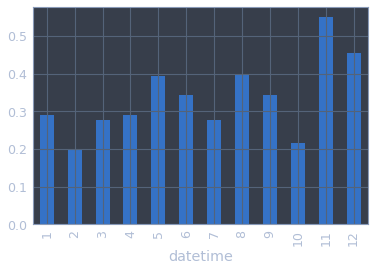

In [8]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp.datetime.dt.month).mean().plot.bar()